### Setup and Data Load

In [ ]:
!sudo apt-get update
! sudo apt-get install tree

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,688 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,824 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,788 kB]
Get:

In [ ]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_root = '/content/drive/MyDrive/266-final/'
# dir_data = '/content/drive/MyDrive/266-final/data/'
# dir_data = '/content/drive/MyDrive/266-final/data/se21-t1-comp-lex-master/'
dir_data = '/content/drive/MyDrive/266-final/data/266-comp-lex-master'
dir_models = '/content/drive/MyDrive/266-final/models/'
dir_results = '/content/drive/MyDrive/266-final/results/'
# log_filename = "experiment_runs.txt"
# log_filepath = os.path.join(dir_results, log_filename)

In [ ]:
!tree -L 1 /content/drive/MyDrive/266-final/results/

/content/drive/MyDrive/266-final/results/
├── data_engineering_qa
├── experiment_results_2025-04-11T09:40:45.673867-07:00.xlsx
├── experiment_results_2025-04-11T15:09:24.583184-07:00.xlsx
├── experiment_results_2025-04-12T15:27:48.297397-07:00.xlsx
├── experiment-results-archive
├── experiment_runs.txt
├── multi_bert-base-cased_binary_complexity_sentence_no_contractions_errors.csv
├── multi_bert-large-cased_binary_complexity_sentence_no_contractions_errors.csv
├── multi_grouped_avg_metrics_performance_table.xlsx
├── multi_modernbert-base_binary_complexity_sentence_no_contractions_errors.csv
├── multi_modernbert-large_binary_complexity_sentence_no_contractions_errors.csv
├── Performance over Baseline Metrics with Point Change.csv
├── Performance over Baseline Metrics with Point Change.gsheet
├── Performance over Baseline Metrics.xlsx
├── sentence_span_analysis.csv
├── sentence_span_analysis_no_contractions.csv
├── single_bert-base-cased_binary_complexity_sentence_no_contractions_errors.

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/266-final/results/experiment_results_2025-04-11T15:09:24.583184-07:00.xlsx')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 38 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   timestamp                                                     240 non-null    object 
 1   experiment_meta.model_name                                    240 non-null    object 
 2   experiment_meta.x_task                                        240 non-null    object 
 3   experiment_meta.x_col                                         240 non-null    object 
 4   model_details.config_attributes.attention_probs_dropout_prob  173 non-null    float64
 5   model_details.config_attributes.hidden_dropout_prob           173 non-null    float64
 6   model_details.config_attributes.num_hidden_layers             215 non-null    float64
 7   model_details.model_total_params                              240 non-n

### Basic Visualizations

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


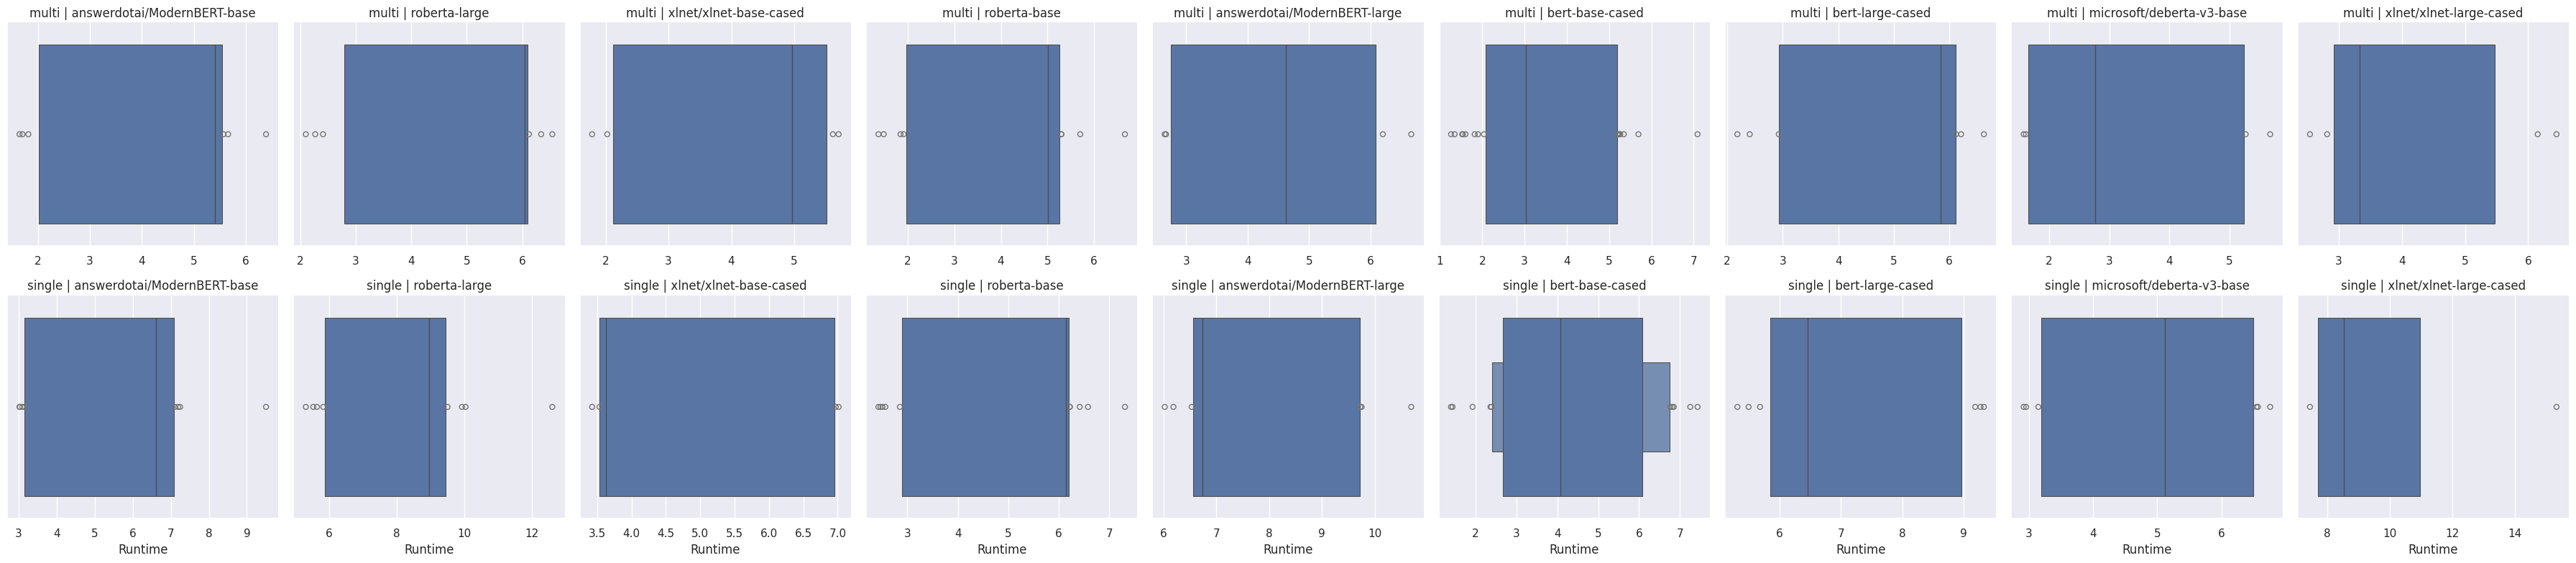

In [ ]:
sns.set(rc={'figure.figsize':(8,16)})
g = sns.FacetGrid(df, row="experiment_meta.x_task", col="experiment_meta.model_name.1", sharex=False, sharey=False, height=4)
g.map(sns.boxenplot, "run_metrics.test_eval_runtime")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_axis_labels("Runtime", "")
plt.tight_layout()
plt.show()

In [ ]:
# print(unique_x_tasks)

In [ ]:
# print(unique_models)

- performance per model

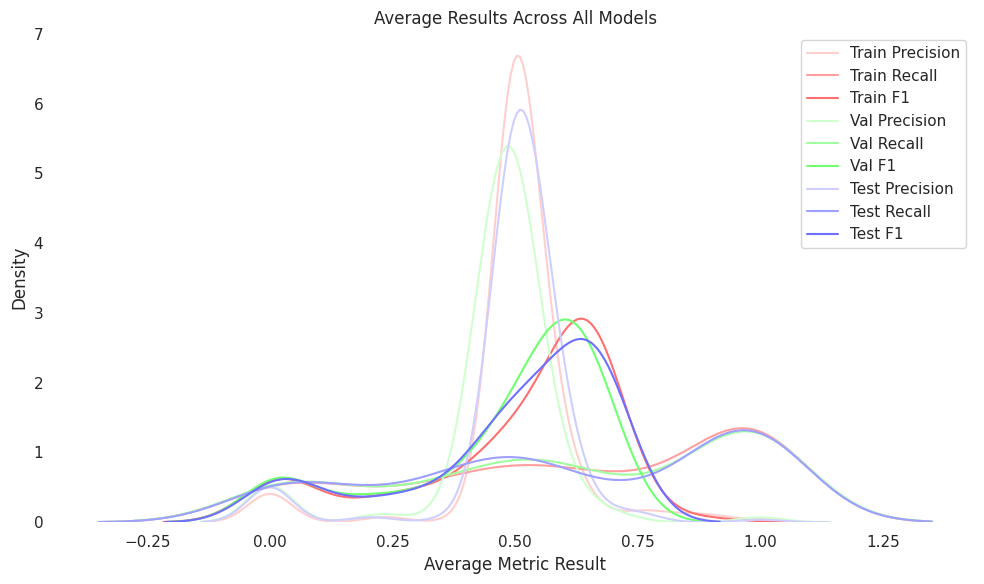

In [ ]:
sns.set_style("white")
plot_df = pd.concat([df], ignore_index=True)
train_cols = ['run_metrics.train_eval_precision','run_metrics.train_eval_recall','run_metrics.train_eval_f1']
val_cols = ['run_metrics.val_eval_precision','run_metrics.val_eval_recall','run_metrics.val_eval_f1']
test_cols = ['run_metrics.test_eval_precision','run_metrics.test_eval_recall','run_metrics.test_eval_f1']
train_colors = ['#FFCFCF','#FF9F9F','#FF6F6F']
val_colors = ['#CFFFCF','#9FFF9F','#6FFF6F']
test_colors = ['#CFCFFF','#9F9FFF','#6F6FFF']
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
sns.kdeplot(plot_df[train_cols[0]], ax=ax, color=train_colors[0], label='Train Precision')
sns.kdeplot(plot_df[train_cols[1]], ax=ax, color=train_colors[1], label='Train Recall')
sns.kdeplot(plot_df[train_cols[2]], ax=ax, color=train_colors[2], label='Train F1')
sns.kdeplot(plot_df[val_cols[0]], ax=ax, color=val_colors[0], label='Val Precision')
sns.kdeplot(plot_df[val_cols[1]], ax=ax, color=val_colors[1], label='Val Recall')
sns.kdeplot(plot_df[val_cols[2]], ax=ax, color=val_colors[2], label='Val F1')
sns.kdeplot(plot_df[test_cols[0]], ax=ax, color=test_colors[0], label='Test Precision')
sns.kdeplot(plot_df[test_cols[1]], ax=ax, color=test_colors[1], label='Test Recall')
sns.kdeplot(plot_df[test_cols[2]], ax=ax, color=test_colors[2], label='Test F1')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Average Results Across All Models')
ax.set_xlabel("Average Metric Result")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
df_single = df[(df['experiment_meta.x_task']=='single') & (df['experiment_meta.model_name.1'].isin(['bert-base-cased','bert-large-cased','answerdotai/ModernBERT-base','answerdotai/ModernBERT-large']))]
df_multi = df[(df['experiment_meta.x_task']=='multi') & (df['experiment_meta.model_name.1'].isin(['bert-base-cased','bert-large-cased','answerdotai/ModernBERT-base','answerdotai/ModernBERT-large']))]
# cols = ['experiment_meta.model_name.1','experiment_meta.x_col','model_details.config_attributes.attention_probs_dropout_prob','model_details.config_attributes.hidden_dropout_prob','model_details.config_attributes.num_hidden_layers','model_details.model_total_params','model_details.model_trainable_params','experiment_meta.learning_rate','experiment_meta.epochs','experiment_meta.batch_size','experiment_meta.weight_decay','experiment_meta.y_col']
cols = ['experiment_meta.model_name.1','experiment_meta.x_col','model_details.config_attributes.attention_probs_dropout_prob','model_details.config_attributes.hidden_dropout_prob','model_details.config_attributes.num_hidden_layers','model_details.model_total_params','model_details.model_trainable_params','experiment_meta.learning_rate','experiment_meta.epochs','experiment_meta.batch_size','experiment_meta.weight_decay','experiment_meta.y_col','run_metrics.train_eval_loss','run_metrics.train_eval_accuracy','run_metrics.train_eval_precision','run_metrics.train_eval_recall','run_metrics.train_eval_f1','run_metrics.train_eval_runtime','run_metrics.train_epoch','run_metrics.val_eval_loss','run_metrics.val_eval_accuracy','run_metrics.val_eval_precision','run_metrics.val_eval_recall','run_metrics.val_eval_f1','run_metrics.val_eval_runtime','run_metrics.test_eval_loss','run_metrics.test_eval_accuracy','run_metrics.test_eval_precision','run_metrics.test_eval_recall','run_metrics.test_eval_f1','run_metrics.test_eval_runtime','Dataset Balance']
print(cols)


['experiment_meta.model_name.1', 'experiment_meta.x_col', 'model_details.config_attributes.attention_probs_dropout_prob', 'model_details.config_attributes.hidden_dropout_prob', 'model_details.config_attributes.num_hidden_layers', 'model_details.model_total_params', 'model_details.model_trainable_params', 'experiment_meta.learning_rate', 'experiment_meta.epochs', 'experiment_meta.batch_size', 'experiment_meta.weight_decay', 'experiment_meta.y_col', 'run_metrics.train_eval_loss', 'run_metrics.train_eval_accuracy', 'run_metrics.train_eval_precision', 'run_metrics.train_eval_recall', 'run_metrics.train_eval_f1', 'run_metrics.train_eval_runtime', 'run_metrics.train_epoch', 'run_metrics.val_eval_loss', 'run_metrics.val_eval_accuracy', 'run_metrics.val_eval_precision', 'run_metrics.val_eval_recall', 'run_metrics.val_eval_f1', 'run_metrics.val_eval_runtime', 'run_metrics.test_eval_loss', 'run_metrics.test_eval_accuracy', 'run_metrics.test_eval_precision', 'run_metrics.test_eval_recall', 'run_m

- performance by single and multi task, for just four bert and modernbert models of interest

In [ ]:
# display(df_single)

In [ ]:
# display(df_multi)

In [ ]:
q_single = df_single['run_metrics.test_eval_f1'].quantile(0.75)
df_single_top = df_single[df_single['run_metrics.test_eval_f1'] >= q_single].drop_duplicates(subset=cols)
q_multi = df_multi['run_metrics.test_eval_f1'].quantile(0.75)
df_multi_top = df_multi[df_multi['run_metrics.test_eval_f1'] >= q_multi].drop_duplicates(subset=cols)
print("Unique experiment combos for x_task='single':")
# display(df_single_top[cols])

Unique experiment combos for x_task='single':


In [ ]:
print("\nUnique experiment combos for x_task='multi':")
# display(df_multi_top[cols])


Unique experiment combos for x_task='multi':


### Graphics Workspace

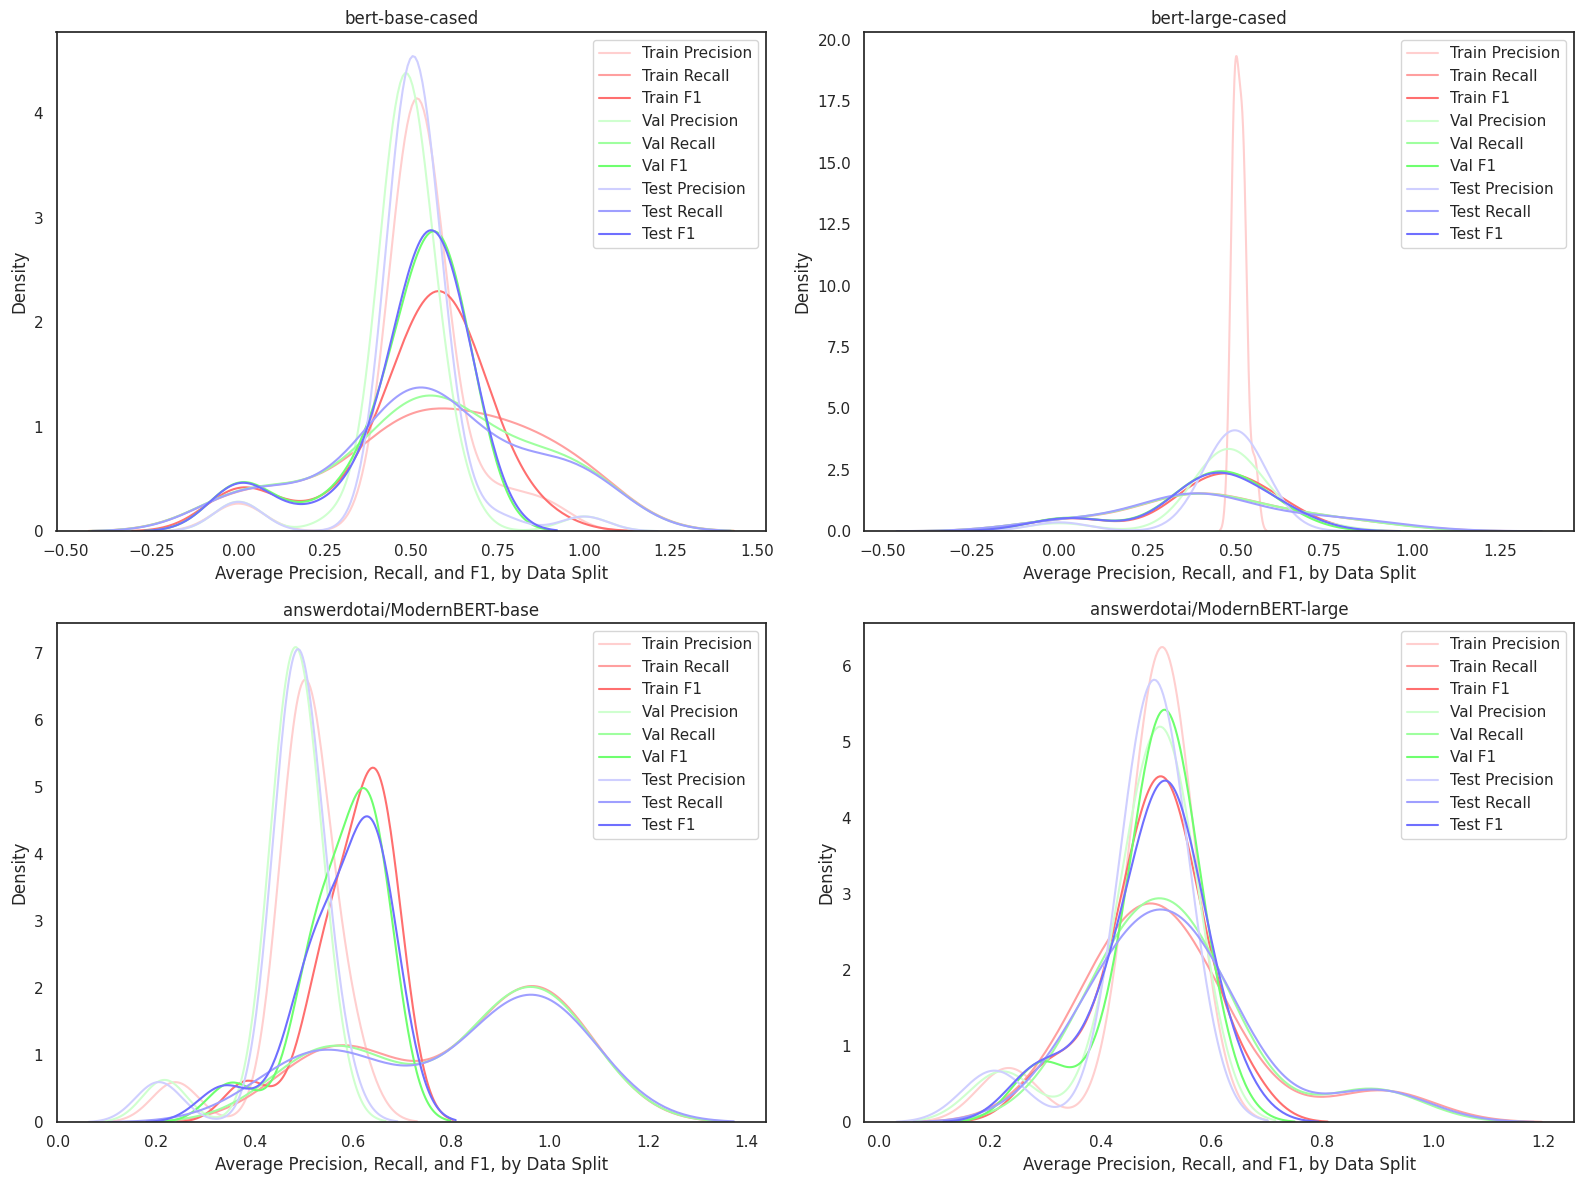

In [ ]:
# single task average performance

plot_df = pd.concat([df_single], ignore_index=True)
models = ['bert-base-cased','bert-large-cased','answerdotai/ModernBERT-base','answerdotai/ModernBERT-large']
train_cols = ['run_metrics.train_eval_precision','run_metrics.train_eval_recall','run_metrics.train_eval_f1']
val_cols = ['run_metrics.val_eval_precision','run_metrics.val_eval_recall','run_metrics.val_eval_f1']
test_cols = ['run_metrics.test_eval_precision','run_metrics.test_eval_recall','run_metrics.test_eval_f1']
train_colors = ['#FFCFCF','#FF9F9F','#FF6F6F']
val_colors = ['#CFFFCF','#9FFF9F','#6FFF6F']
test_colors = ['#CFCFFF','#9F9FFF','#6F6FFF']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
fig.patch.set_facecolor('white')
axes = axes.flatten()
for i, model in enumerate(models):
    sub = plot_df[plot_df['experiment_meta.model_name.1'] == model]
    sns.kdeplot(sub[train_cols[0]], ax=axes[i], color=train_colors[0], label='Train Precision')
    sns.kdeplot(sub[train_cols[1]], ax=axes[i], color=train_colors[1], label='Train Recall')
    sns.kdeplot(sub[train_cols[2]], ax=axes[i], color=train_colors[2], label='Train F1')
    sns.kdeplot(sub[val_cols[0]], ax=axes[i], color=val_colors[0], label='Val Precision')
    sns.kdeplot(sub[val_cols[1]], ax=axes[i], color=val_colors[1], label='Val Recall')
    sns.kdeplot(sub[val_cols[2]], ax=axes[i], color=val_colors[2], label='Val F1')
    sns.kdeplot(sub[test_cols[0]], ax=axes[i], color=test_colors[0], label='Test Precision')
    sns.kdeplot(sub[test_cols[1]], ax=axes[i], color=test_colors[1], label='Test Recall')
    sns.kdeplot(sub[test_cols[2]], ax=axes[i], color=test_colors[2], label='Test F1')
    axes[i].set_facecolor('white')
    axes[i].set_title(model)
    axes[i].set_xlabel("Average Precision, Recall, and F1, by Data Split")
    axes[i].legend()
plt.tight_layout()
plt.show()


<ipython-input-18-0c2c95028dad>:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(sub[val_cols[1]], ax=axes[i], color=val_colors[1], label='Val Recall')


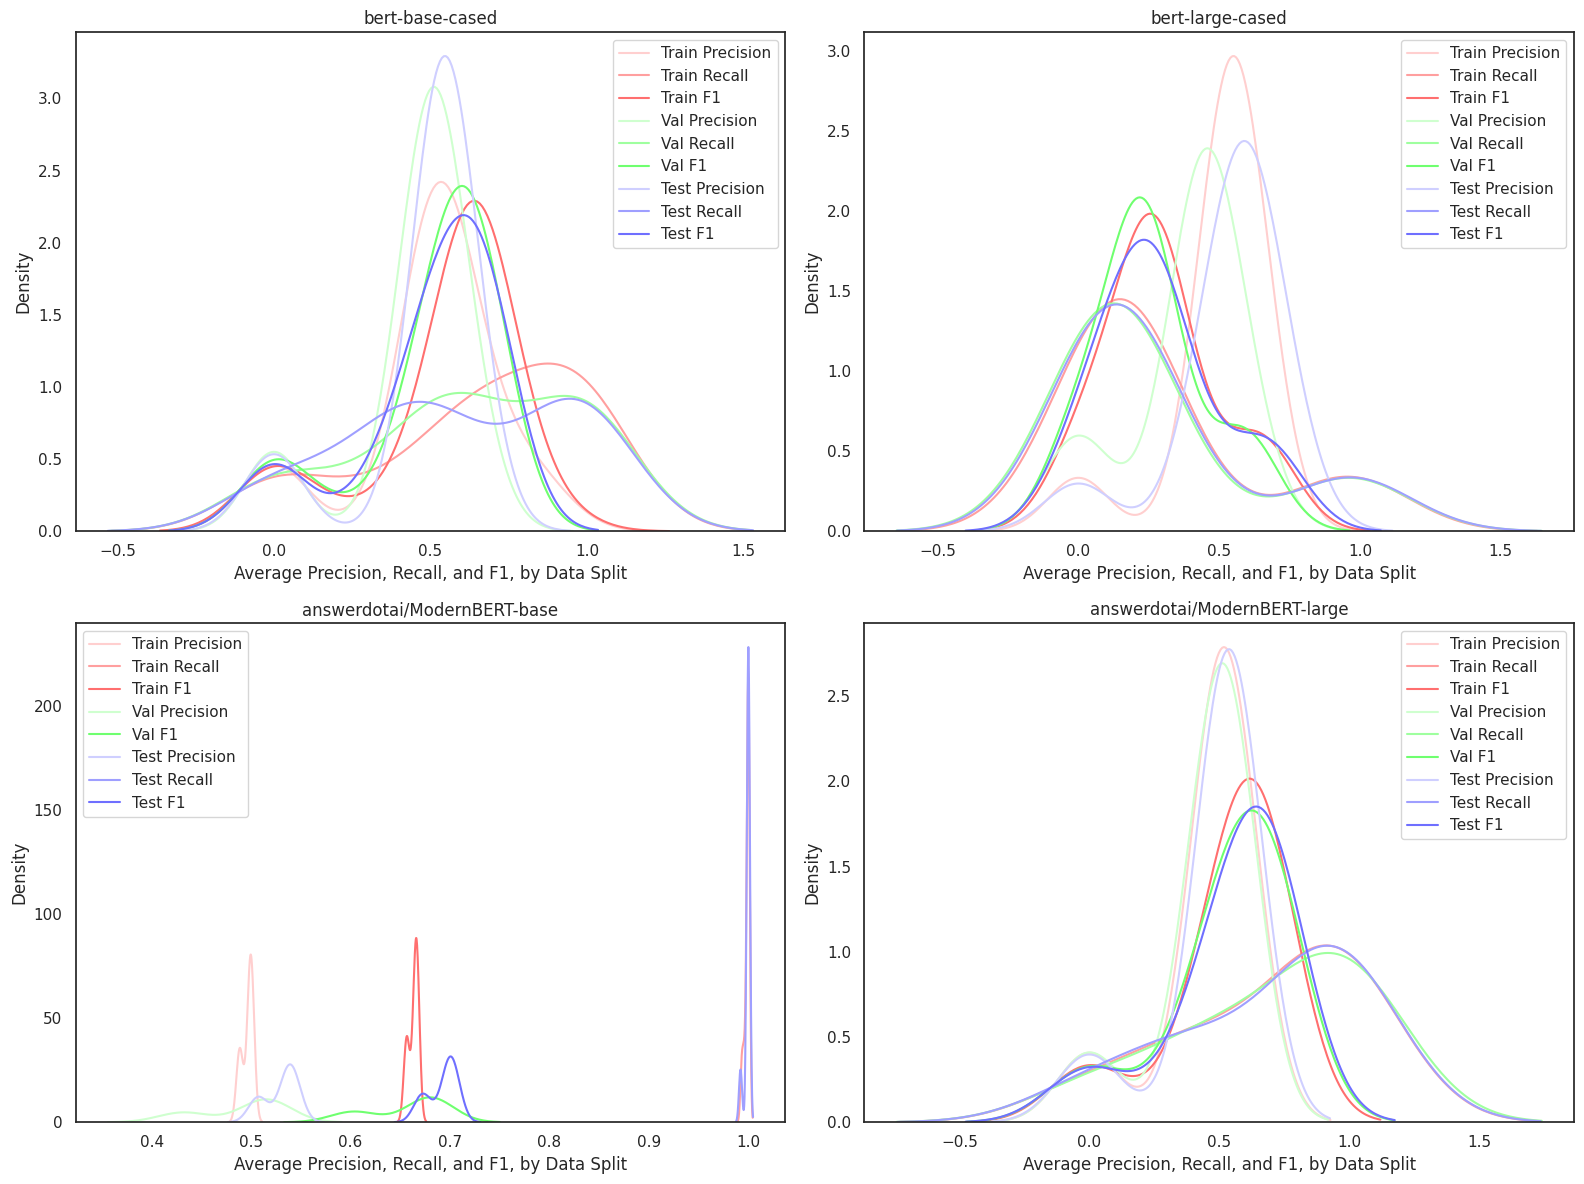

In [ ]:
# multi task average performance

plot_df = pd.concat([df_multi], ignore_index=True)
models = ['bert-base-cased','bert-large-cased','answerdotai/ModernBERT-base','answerdotai/ModernBERT-large']
train_cols = ['run_metrics.train_eval_precision','run_metrics.train_eval_recall','run_metrics.train_eval_f1']
val_cols = ['run_metrics.val_eval_precision','run_metrics.val_eval_recall','run_metrics.val_eval_f1']
test_cols = ['run_metrics.test_eval_precision','run_metrics.test_eval_recall','run_metrics.test_eval_f1']
train_colors = ['#FFCFCF','#FF9F9F','#FF6F6F']
val_colors = ['#CFFFCF','#9FFF9F','#6FFF6F']
test_colors = ['#CFCFFF','#9F9FFF','#6F6FFF']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
fig.patch.set_facecolor('white')
axes = axes.flatten()
for i, model in enumerate(models):
    sub = plot_df[plot_df['experiment_meta.model_name.1'] == model]
    sns.kdeplot(sub[train_cols[0]], ax=axes[i], color=train_colors[0], label='Train Precision')
    sns.kdeplot(sub[train_cols[1]], ax=axes[i], color=train_colors[1], label='Train Recall')
    sns.kdeplot(sub[train_cols[2]], ax=axes[i], color=train_colors[2], label='Train F1')
    sns.kdeplot(sub[val_cols[0]], ax=axes[i], color=val_colors[0], label='Val Precision')
    sns.kdeplot(sub[val_cols[1]], ax=axes[i], color=val_colors[1], label='Val Recall')
    sns.kdeplot(sub[val_cols[2]], ax=axes[i], color=val_colors[2], label='Val F1')
    sns.kdeplot(sub[test_cols[0]], ax=axes[i], color=test_colors[0], label='Test Precision')
    sns.kdeplot(sub[test_cols[1]], ax=axes[i], color=test_colors[1], label='Test Recall')
    sns.kdeplot(sub[test_cols[2]], ax=axes[i], color=test_colors[2], label='Test F1')
    axes[i].set_facecolor('white')
    axes[i].set_title(model)
    axes[i].set_xlabel("Average Precision, Recall, and F1, by Data Split")
    axes[i].legend()
plt.tight_layout()
plt.show()


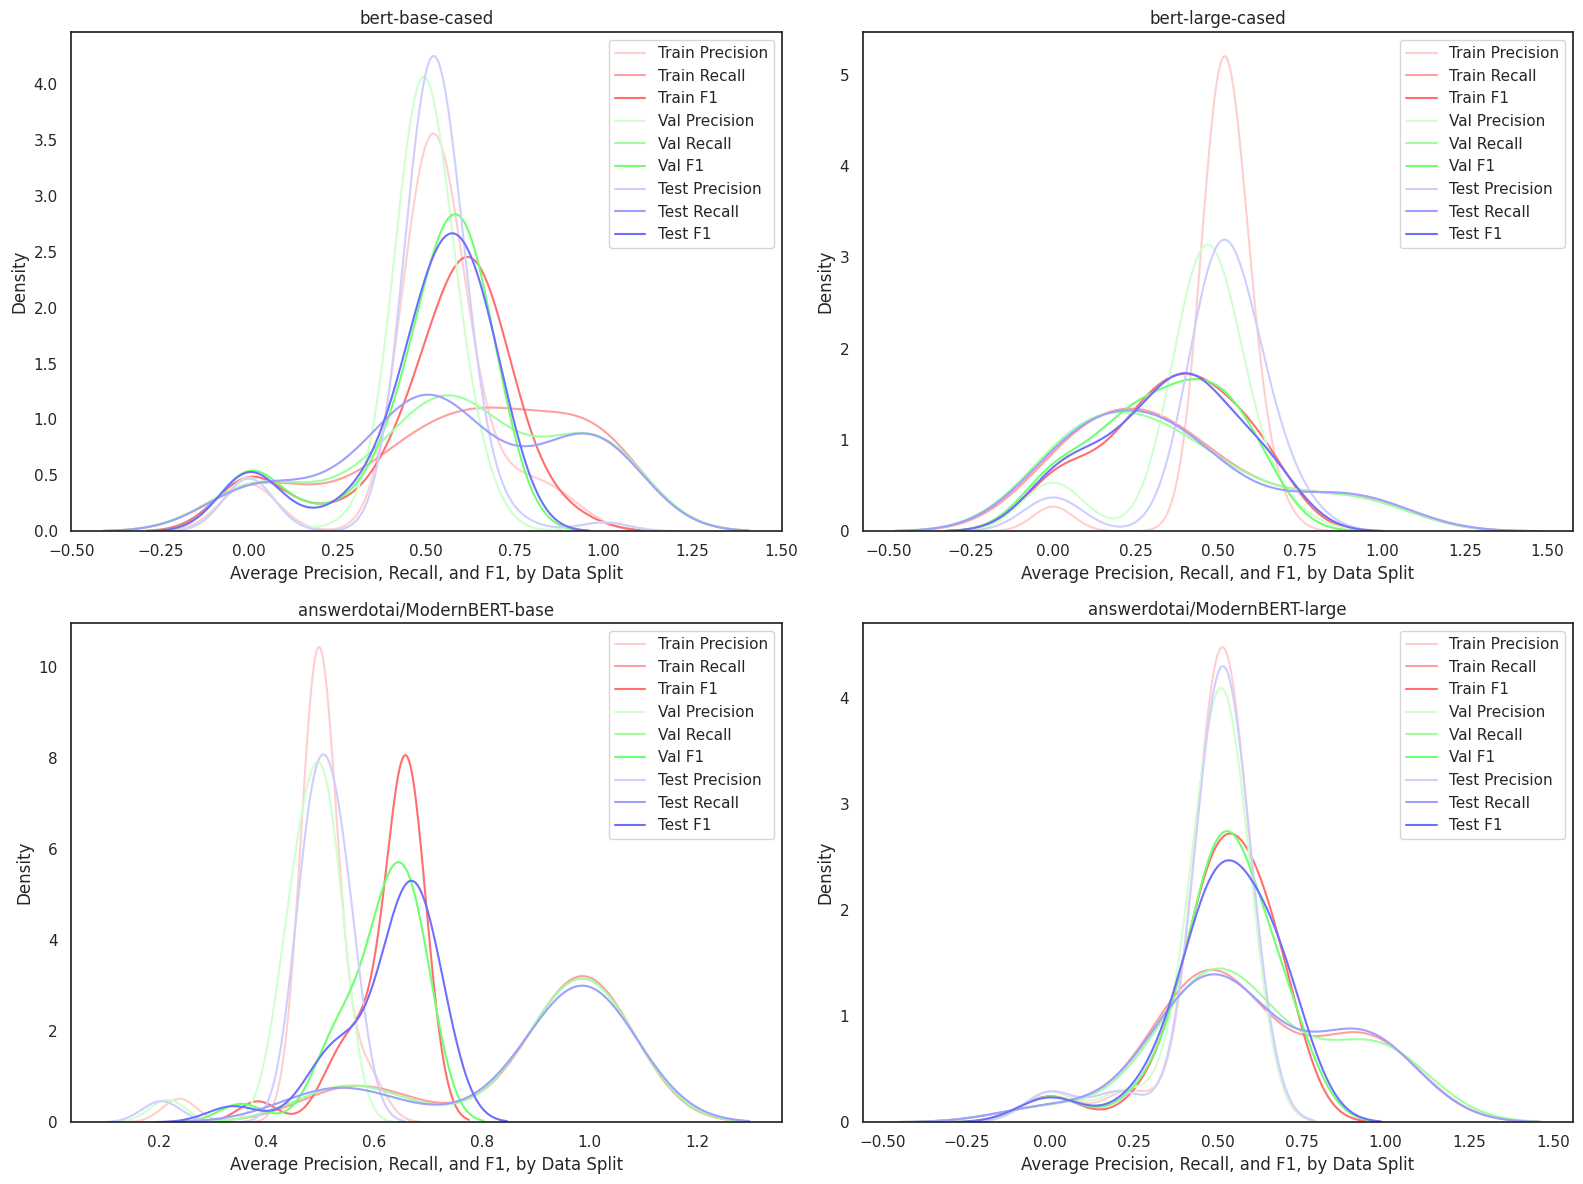

In [ ]:
plot_df = pd.concat([df_single, df_multi], ignore_index=True)
models = ['bert-base-cased','bert-large-cased','answerdotai/ModernBERT-base','answerdotai/ModernBERT-large']
train_cols = ['run_metrics.train_eval_precision','run_metrics.train_eval_recall','run_metrics.train_eval_f1']
val_cols = ['run_metrics.val_eval_precision','run_metrics.val_eval_recall','run_metrics.val_eval_f1']
test_cols = ['run_metrics.test_eval_precision','run_metrics.test_eval_recall','run_metrics.test_eval_f1']
train_colors = ['#FFCFCF','#FF9F9F','#FF6F6F']
val_colors = ['#CFFFCF','#9FFF9F','#6FFF6F']
test_colors = ['#CFCFFF','#9F9FFF','#6F6FFF']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
fig.patch.set_facecolor('white')
axes = axes.flatten()
for i, model in enumerate(models):
    sub = plot_df[plot_df['experiment_meta.model_name.1'] == model]
    sns.kdeplot(sub[train_cols[0]], ax=axes[i], color=train_colors[0], label='Train Precision')
    sns.kdeplot(sub[train_cols[1]], ax=axes[i], color=train_colors[1], label='Train Recall')
    sns.kdeplot(sub[train_cols[2]], ax=axes[i], color=train_colors[2], label='Train F1')
    sns.kdeplot(sub[val_cols[0]], ax=axes[i], color=val_colors[0], label='Val Precision')
    sns.kdeplot(sub[val_cols[1]], ax=axes[i], color=val_colors[1], label='Val Recall')
    sns.kdeplot(sub[val_cols[2]], ax=axes[i], color=val_colors[2], label='Val F1')
    sns.kdeplot(sub[test_cols[0]], ax=axes[i], color=test_colors[0], label='Test Precision')
    sns.kdeplot(sub[test_cols[1]], ax=axes[i], color=test_colors[1], label='Test Recall')
    sns.kdeplot(sub[test_cols[2]], ax=axes[i], color=test_colors[2], label='Test F1')
    axes[i].set_facecolor('white')
    axes[i].set_title(model)
    axes[i].set_xlabel("Average Precision, Recall, and F1, by Data Split")

    axes[i].legend()
plt.tight_layout()
plt.show()


In [ ]:
print(df_multi.describe())

       model_details.config_attributes.attention_probs_dropout_prob  \
count                                       4.200000e+01              
mean                                        1.000000e-01              
std                                         1.404601e-17              
min                                         1.000000e-01              
25%                                         1.000000e-01              
50%                                         1.000000e-01              
75%                                         1.000000e-01              
max                                         1.000000e-01              

       model_details.config_attributes.hidden_dropout_prob  \
count                                       4.200000e+01     
mean                                        1.000000e-01     
std                                         1.404601e-17     
min                                         1.000000e-01     
25%                                         1.0000

In [ ]:
print(df_single.describe())

       model_details.config_attributes.attention_probs_dropout_prob  \
count                                       5.300000e+01              
mean                                        1.000000e-01              
std                                         5.604237e-17              
min                                         1.000000e-01              
25%                                         1.000000e-01              
50%                                         1.000000e-01              
75%                                         1.000000e-01              
max                                         1.000000e-01              

       model_details.config_attributes.hidden_dropout_prob  \
count                                       5.300000e+01     
mean                                        1.000000e-01     
std                                         5.604237e-17     
min                                         1.000000e-01     
25%                                         1.0000

<ipython-input-22-7f53b99abae9>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=summary_df, x='model', y='value', hue='metric', ci='sd')


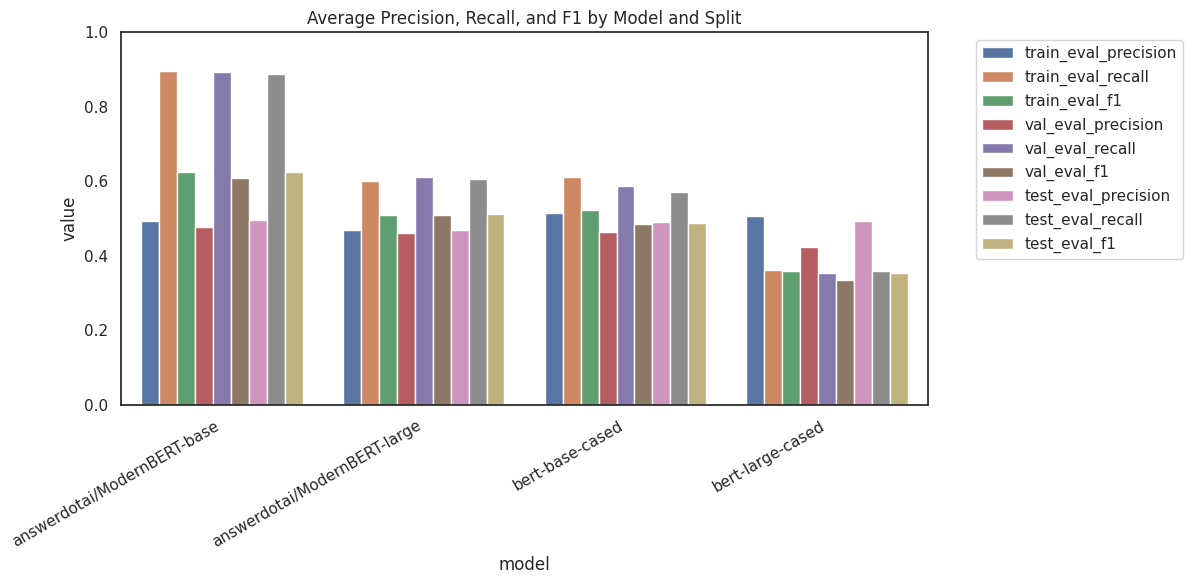

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = pd.concat([df_single, df_multi], ignore_index=True)

metrics = {
    'Train': ['run_metrics.train_eval_precision','run_metrics.train_eval_recall','run_metrics.train_eval_f1'],
    'Val':   ['run_metrics.val_eval_precision','run_metrics.val_eval_recall','run_metrics.val_eval_f1'],
    'Test':  ['run_metrics.test_eval_precision','run_metrics.test_eval_recall','run_metrics.test_eval_f1']
}

rows = []
for split, cols in metrics.items():
    for col in cols:
        metric_name = col.split('.')[-1]  # e.g. "train_eval_precision" -> "train_eval_precision"
        agg = plot_df.groupby('experiment_meta.model_name.1')[col].mean().reset_index()
        agg.columns = ['model', 'value']
        agg['metric'] = metric_name
        agg['split'] = split
        rows.append(agg)

summary_df = pd.concat(rows, ignore_index=True)

plt.figure(figsize=(12,6))
sns.barplot(data=summary_df, x='model', y='value', hue='metric', ci='sd')
plt.xticks(rotation=30, ha='right')
plt.ylim(0,1)
plt.title('Average Precision, Recall, and F1 by Model and Split')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-23-68529b142e15>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=summary_df, x='model', y='value', hue='metric', ci='sd')


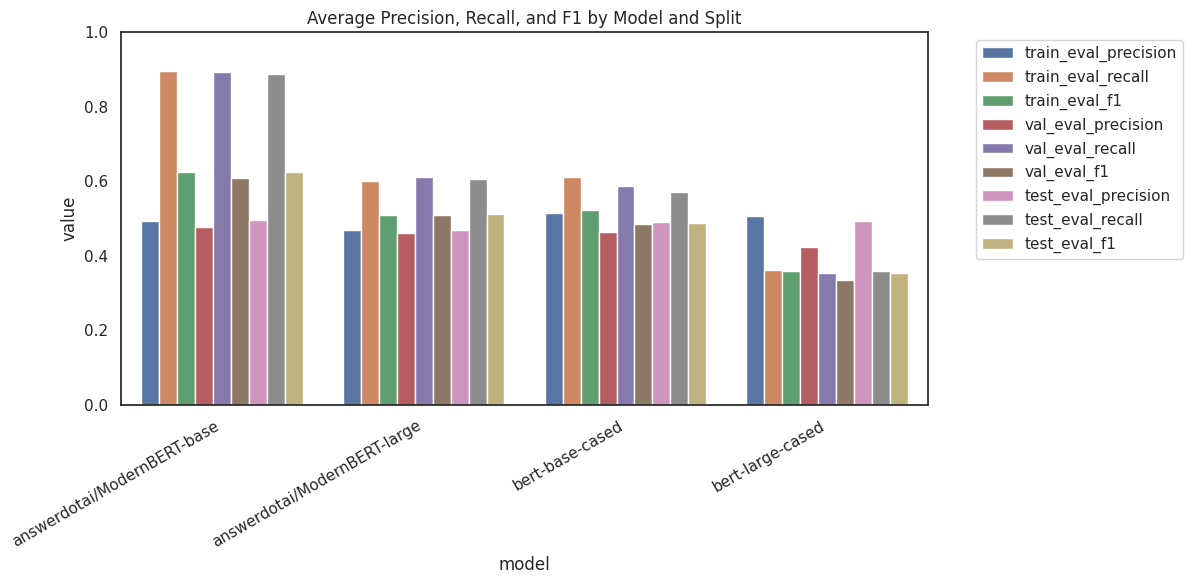

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = pd.concat([df_single, df_multi], ignore_index=True)

metrics = {
    'Train': ['run_metrics.train_eval_precision','run_metrics.train_eval_recall','run_metrics.train_eval_f1'],
    'Val':   ['run_metrics.val_eval_precision','run_metrics.val_eval_recall','run_metrics.val_eval_f1'],
    'Test':  ['run_metrics.test_eval_precision','run_metrics.test_eval_recall','run_metrics.test_eval_f1']
}

rows = []
for split, cols in metrics.items():
    for col in cols:
        metric_name = col.split('.')[-1]  # e.g. "train_eval_precision" -> "train_eval_precision"
        agg = plot_df.groupby('experiment_meta.model_name.1')[col].mean().reset_index()
        agg.columns = ['model', 'value']
        agg['metric'] = metric_name
        agg['split'] = split
        rows.append(agg)

summary_df = pd.concat(rows, ignore_index=True)

plt.figure(figsize=(12,6))
sns.barplot(data=summary_df, x='model', y='value', hue='metric', ci='sd')
plt.xticks(rotation=30, ha='right')
plt.ylim(0,1)
plt.title('Average Precision, Recall, and F1 by Model and Split')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Tables Workspace

|           | **BERT**                                                      | **ModernBERT**                                                       |
|-------------------------------|---------------------------------------------------------------|----------------------------------------------------------------------|
| **Publication**               | 2019, BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding                                                           | 2024, Smarter, Better Faster, Longer: A Modern Bidirectional Encoder for Fast, Memory Efficient, and Long Conext Finetuning and Inference                                                                 |
| **Model type**                | Transformer Encoder (bidirectional)                           | Transformer Encoder (bidirectional, local-global attention)          |
| **Parameter count**           | base=110M, large=340M                                         | base=149M, large=395M                                                |
| **Layers**                    | base=12, large=24                                             | base=22, large=28                                                    |
| **Hidden size**               | base=768, large=1024                                          | base=768, large=1024                                                 |
| **Attention heads**           | base=12, large=16                                             | base=12, large=16                                                    |
| **Activation function**       | GELU                                                          | GeGLU                                                                |
| **Max sequence length**       | 512                                                           | 8192                                                                 |
| **Positional embedding**      | learned absolute positions                                    | rotary position embeddings (RoPE)                                    |
| **Vocabulary**                | WordPiece                                                     | Byte-pair encoding                                                   |
| **Pre-training data**         | BooksCorpus + Wikipedia (3.3B words)                          | Mixed domain (2T tokens)                                             |
| **Main objectives**           | 1) masked language model (MLM, 15% mask), 2) next sentence prediction (NSP) | masked language model (MLM, 30% mask), extended training for long context |
| **Local vs. global attention**| all global with 512 tokens                                    | alternates local sliding window and global attention                 |
| **Unpadding**                 | none                                                          | removes padded tokens across layers                                  |
| **FlashAttention**            | not used                                                      | specialized GPU kernel for aggregated attention computations         |
| **Optimizer**                 | Adam (with or without warmup)                                 | StableAdamW (with or without warmup)                                 |
| **Training strategy**         | 1M steps, ~128k tokens/batch                                  | over 2T tokens, multi-phase (includes context extension)             |


#### Naive Bayes Baseline (SemEval-2021 Data Split)

| **Task** | **X Variable**                   | **Y Variable**        | **Dataset Balance** | **Macro Precision** | **Macro Recall** | **Macro F1** | **Weighted Precision** | **Weighted Recall** | **Weighted F1** |
|:--------:|:---------------------------------|:----------------------|:--------------------|---------------------:|------------------:|------------:|------------------------:|---------------------:|----------------:|
| single   | sentence_no_contractions         | binary_complexity     | SemEval-2021        | 0.57                | 0.56             | 0.55         | 0.56                   | 0.57                | 0.56            |
| single   | sentence                         | binary_complexity     | SemEval-2021        | 0.57                | 0.56             | 0.55         | 0.56                   | 0.57                | 0.56            |
| multi    | sentence_no_contractions         | binary_complexity     | SemEval-2021        | 0.53                | 0.54             | 0.53         | 0.53                   | 0.54                | 0.53            |
| multi    | sentence                         | binary_complexity     | SemEval-2021        | 0.54                | 0.54             | 0.53         | 0.53                   | 0.54                | 0.53            |
| single   | pos_sequence                     | binary_complexity     | SemEval-2021        | 0.57                | 0.56             | 0.57         | 0.57                   | 0.57                | 0.57            |
| multi    | pos_sequence                     | binary_complexity     | SemEval-2021        | 0.59                | 0.58             | 0.58         | 0.59                   | 0.59                | 0.59            |
| single   | dep_sequence                     | binary_complexity     | SemEval-2021        | 0.57                | 0.57             | 0.57         | 0.57                   | 0.57                | 0.57            |
| multi    | dep_sequence                     | binary_complexity     | SemEval-2021        | 0.53                | 0.52             | 0.52         | 0.53                   | 0.52                | 0.52            |
| single   | morph_sequence                   | binary_complexity     | SemEval-2021        | 0.58                | 0.58             | 0.58         | 0.58                   | 0.58                | 0.58            |
| multi    | morph_sequence                   | binary_complexity     | SemEval-2021        | 0.61                | 0.62             | 0.61         | 0.61                   | 0.62                | 0.61            |
| single   | snc_pos_seq                      | binary_complexity     | SemEval-2021        | 0.57                | 0.56             | 0.55         | 0.56                   | 0.57                | 0.56            |
| single   | snc_pos_alt                      | binary_complexity     | SemEval-2021        | 0.57                | 0.56             | 0.55         | 0.56                   | 0.57                | 0.56            |
| single   | snc_morph_seq                    | binary_complexity     | SemEval-2021        | 0.58                | 0.56             | 0.55         | 0.58                   | 0.57                | 0.56            |
| single   | snc_morph_alt                    | binary_complexity     | SemEval-2021        | 0.58                | 0.57             | 0.55         | 0.58                   | 0.57                | 0.56            |
| single   | snc_dep_seq                      | binary_complexity     | SemEval-2021        | 0.57                | 0.56             | 0.55         | 0.56                   | 0.57                | 0.56            |
| single   | snc_dep_alt                      | binary_complexity     | SemEval-2021        | 0.57                | 0.56             | 0.55         | 0.56                   | 0.57                | 0.56            |
| multi    | snc_pos_seq                      | binary_complexity     | SemEval-2021        | 0.57                | 0.57             | 0.57         | 0.56                   | 0.57                | 0.56            |
| multi    | snc_pos_alt                      | binary_complexity     | SemEval-2021        | 0.57                | 0.57             | 0.57         | 0.56                   | 0.57                | 0.56            |
| multi    | snc_morph_seq                    | binary_complexity     | SemEval-2021        | 0.60                | 0.61             | 0.60         | 0.60                   | 0.60                | 0.60            |
| multi    | snc_morph_alt                    | binary_complexity     | SemEval-2021        | 0.60                | 0.60             | 0.60         | 0.59                   | 0.60                | 0.59            |
| multi    | snc_dep_seq                      | binary_complexity     | SemEval-2021        | 0.57                | 0.57             | 0.57         | 0.56                   | 0.57                | 0.56            |
| multi    | snc_dep_alt                      | binary_complexity     | SemEval-2021        | 0.58                | 0.58             | 0.57         | 0.58                   | 0.58                | 0.58            |
| multi    | snc_morph_complexity_value       | binary_complexity     | SemEval-2021        | 0.54                | 0.54             | 0.53         | 0.53                   | 0.54                | 0.53            |


#### Naive Bayes Baseline (Re-Balanced Data Split)

| **Task** | **X Variable**                   | **Y Variable**        | **Dataset Balance** | **Macro Precision** | **Macro Recall** | **Macro F1** | **Weighted Precision** | **Weighted Recall** | **Weighted F1** |
|:--------:|:---------------------------------|:----------------------|:--------------------|---------------------:|------------------:|------------:|------------------------:|---------------------:|----------------:|
| single   | sentence_no_contractions         | binary_complexity     | Re-Balanced         | 0.57                | 0.57             | 0.56         | 0.58                   | 0.57                | 0.56            |
| single   | sentence                         | binary_complexity     | Re-Balanced         | 0.58                | 0.57             | 0.56         | 0.58                   | 0.57                | 0.56            |
| multi    | sentence_no_contractions         | binary_complexity     | Re-Balanced         | 0.63                | 0.62             | 0.63         | 0.64                   | 0.64                | 0.62            |
| multi    | sentence                         | binary_complexity     | Re-Balanced         | 0.63                | 0.62             | 0.63         | 0.64                   | 0.64                | 0.62            |
| single   | pos_sequence                     | binary_complexity     | Re-Balanced         | 0.54                | 0.54             | 0.53         | 0.54                   | 0.54                | 0.54            |
| multi    | pos_sequence                     | binary_complexity     | Re-Balanced         | 0.57                | 0.56             | 0.56         | 0.58                   | 0.58                | 0.58            |
| single   | dep_sequence                     | binary_complexity     | Re-Balanced         | 0.54                | 0.54             | 0.54         | 0.54                   | 0.54                | 0.54            |
| multi    | dep_sequence                     | binary_complexity     | Re-Balanced         | 0.55                | 0.55             | 0.55         | 0.56                   | 0.56                | 0.56            |
| single   | morph_sequence                   | binary_complexity     | Re-Balanced         | 0.54                | 0.54             | 0.54         | 0.55                   | 0.55                | 0.54            |
| multi    | morph_sequence                   | binary_complexity     | Re-Balanced         | 0.59                | 0.59             | 0.59         | 0.60                   | 0.59                | 0.59            |
| single   | snc_pos_seq                      | binary_complexity     | Re-Balanced         | 0.56                | 0.56             | 0.55         | 0.56                   | 0.56                | 0.55            |
| single   | snc_pos_alt                      | binary_complexity     | Re-Balanced         | 0.56                | 0.56             | 0.55         | 0.56                   | 0.56                | 0.55            |
| single   | snc_morph_seq                    | binary_complexity     | Re-Balanced         | 0.58                | 0.56             | 0.55         | 0.58                   | 0.57                | 0.56            |
| single   | snc_morph_alt                    | binary_complexity     | Re-Balanced         | 0.58                | 0.57             | 0.55         | 0.58                   | 0.57                | 0.55            |
| single   | snc_dep_seq                      | binary_complexity     | Re-Balanced         | 0.57                | 0.56             | 0.55         | 0.56                   | 0.57                | 0.55            |
| single   | snc_dep_alt                      | binary_complexity     | Re-Balanced         | 0.56                | 0.57             | 0.55         | 0.56                   | 0.57                | 0.55            |
| multi    | snc_pos_seq                      | binary_complexity     | Re-Balanced         | 0.64                | 0.63             | 0.63         | 0.64                   | 0.64                | 0.64            |
| multi    | snc_pos_alt                      | binary_complexity     | Re-Balanced         | 0.62                | 0.61             | 0.62         | 0.63                   | 0.63                | 0.61            |
| multi    | snc_morph_seq                    | binary_complexity     | Re-Balanced         | 0.65                | 0.64             | 0.65         | 0.66                   | 0.66                | 0.65            |
| multi    | snc_morph_alt                    | binary_complexity     | Re-Balanced         | 0.64                | 0.63             | 0.63         | 0.64                   | 0.65                | 0.63            |
| multi    | snc_dep_seq                      | binary_complexity     | Re-Balanced         | 0.63                | 0.62             | 0.63         | 0.64                   | 0.64                | 0.63            |
| multi    | snc_dep_alt                      | binary_complexity     | Re-Balanced         | 0.61                | 0.60             | 0.60         | 0.63                   | 0.63                | 0.60            |
| multi    | snc_morph_complexity_value       | binary_complexity     | Re-Balanced         | 0.62                | 0.61             | 0.62         | 0.63                   | 0.63                | 0.62            |


## Incorrect Predictions for Single Task Data, by Subcorpus and Symmetric Embedding KL Divergence

| **corpus** | **bert-base-cased Corpus Proportions Misclassified** | **bert-base-cased KL Divergence**    | **bert-large-cased Corpus Proportions Misclassified** | **bert-large-cased KL Divergence**     | **ModernBERT-base Corpus Proportions Misclassified** | **ModernBERT-base KL Divergence**      | **ModernBERT-large Corpus Proportions Misclassified** | **ModernBERT-large KL Divergence**      |
|:----------:|:----------------------------------------------------:|:-------------------------------------:|:------------------------------------------------------:|:----------------------------------------:|:----------------------------------------------------:|:----------------------------------------:|:------------------------------------------------------:|:----------------------------------------:|
| **bible**  | 0.321185                                             | 6.683676775615276e-07                | 0.329876                                             | 6.619976385796855e-07                  | 0.325773                                            | 1.6860511154101313e-06                 | 0.309426                                             | 1.1354024662615837e-06                 |
| **europarl** | 0.357631                                           | 5.228060469033662e-07                | 0.356846                                             | 4.6426749472826705e-07                 | 0.346392                                            | 1.4357515857590244e-06                 | 0.379098                                             | 9.710584787971171e-07                  |
| **biomed** | 0.321185                                             | 3.244608891516798e-07                | 0.313278                                             | 2.593201681598221e-07                  | 0.327835                                            | 1.8457217644529404e-06                 | 0.311475                                             | 8.158935155510512e-07                  |


| **Feature**                      | **Definition**                                                                                                                                                                             | **Example**                                                                                                                                                                                                                                                |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1. sentence_no_contractions** | Original sentence with English contractions expanded.                                                                                                                                      | **Before**: "Don't underestimate us, it's more than complicated!" <br> **After**: "Do not underestimate us, it is more than complicated!"                                                                                                                    |
| **2. pos_sequence**             | A list (array) of each token’s Part-of-Speech (POS) tags from spaCy.                                                                                                                        | ["AUX", "PART", "VERB", "PRON", "PUNCT", "PRON", "AUX", "ADV", "ADP", "ADJ", "PUNCT"]                                                                                                                                                                       |
| **3. dep_sequence**             | A list (array) of each token’s dependency labels (e.g., nsubj, ROOT, dobj).                                                                                                                 | ["aux", "neg", "ROOT", "dobj", "punct", "nsubj", "aux", "advmod", "prep", "acomp", "punct"]                                                                                                                                                               |
| **4. morph_sequence**           | A list (array) of morphological feature strings, e.g. "VerbForm=Fin", "Tense=Past".                                                                                                         | ["VerbForm=Fin\|Tense=Pres", "Polarity=Neg", "VerbForm=Inf", "Case=Acc\|Number=Plur\|Person=1\|PronType=Prs", …]                                                                                                                                          |
| **5. morph_complexity**         | Numeric average count of morphological features per token in the sentence.                                                                                                                   | 2.25 (if each token averages ~2.25 morph features).                                                                                                                                                                                                         |
| **6. snc_pos_seq**              | Concatenation of `sentence_no_contractions` plus bracketed, comma-separated POS tags.                                                                                                        | "Do not underestimate us, it is more than complicated! [AUX, PART, VERB, PRON, PUNCT, PRON, AUX, ADV, ADP, ADJ, PUNCT]"                                                                                                                                     |
| **7. snc_pos_alt**              | Interleaves each token in the expanded sentence with `[POS_TAG]`.                                                                                                                           | "Do [AUX] not [PART] underestimate [VERB] us, [PRON] it [PRON] is [AUX] more [ADV] than [ADP] complicated! [ADJ]"                                                                                                                                           |
| **8. snc_morph_seq**            | Concatenation of the expanded sentence plus bracketed, comma-separated morphological features.                                                                                              | "Do not underestimate us, it is more than complicated! [(VerbForm=Fin\|Tense=Pres), (Polarity=Neg), (VerbForm=Inf), (Case=Acc\|Number=Plur\|Person=1\|PronType=Prs), …]"                                                                                  |
| **9. snc_morph_alt**            | Interleaves each token in the expanded sentence with `[({morph_features})]`.                                                                                                                 | "Do [(VerbForm=Fin\|Tense=Pres)] not [(Polarity=Neg)] underestimate [(VerbForm=Inf)] us, [(Case=Acc\|Number=Plur\|Person=1\|PronType=Prs)] it [(Case=Nom\|Number=Sing\|Person=3)] is [(VerbForm=Fin)] more [(Degree=Pos)] ..."                             |
| **10. snc_dep_seq**             | Concatenation of expanded sentence plus bracketed, comma-separated dependency labels.                                                                                                        | "Do not underestimate us, it is more than complicated! [aux, neg, ROOT, dobj, punct, nsubj, aux, advmod, prep, acomp, punct]"                                                                                                                              |
| **11. snc_dep_alt**             | Interleaves each token in the expanded sentence with `[DEP_LABEL]`.                                                                                                                         | "Do [aux] not [neg] underestimate [ROOT] us, [dobj] it [nsubj] is [aux] more [advmod] than [prep] complicated! [acomp]"                                                                                                                                    |
| **12. snc_morph_complexity_value** | Expanded sentence plus a numeric morphological complexity appended at the end.                                                                                                            | "Do not underestimate us, it is more than complicated! 2.25" (where 2.25 is the morph_complexity value).                                                                                                                                                   |


### BERT vs ModernBERT Results Workspace

In [ ]:
models = ['bert-base-cased','bert-large-cased','answerdotai/ModernBERT-base','answerdotai/ModernBERT-large']
single_df_filtered = df_single[df_single['experiment_meta.model_name.1'].isin(models)]
multi_df_filtered = df_multi[df_multi['experiment_meta.model_name.1'].isin(models)]
# print("Single DF (Filtered):")
# print(single_df_filtered)
# print("\nMulti DF (Filtered):")
# print(multi_df_filtered)
# single_df_filtered.to_excel(f"{dir_results}/single_df_filtered.xlsx", index=False)
# multi_df_filtered.to_excel(f"{dir_results}/multi_df_filtered.xlsx", index=False)


In [ ]:
# import pandas as pd

# models = ['bert-base-cased','bert-large-cased','answerdotai/ModernBERT-base','answerdotai/ModernBERT-large']
# single_df_filtered = df_single[df_single['experiment_meta.model_name.1'].isin(models)]
# multi_df_filtered = df_multi[df_multi['experiment_meta.model_name.1'].isin(models)]

group_cols = [
    'experiment_meta.model_name.1',
    'experiment_meta.x_col',
    'experiment_meta.weight_decay',
    'experiment_meta.learning_rate',
    'experiment_meta.epochs',
    'Dataset Balance'
]

agg_dict = {
    'run_metrics.train_eval_accuracy': 'mean',
    'run_metrics.train_eval_loss': 'mean',
    'run_metrics.train_eval_precision': 'mean',
    'run_metrics.train_eval_recall': 'mean',
    'run_metrics.train_eval_f1': 'mean',
    'run_metrics.val_eval_accuracy': 'mean',
    'run_metrics.val_eval_loss': 'mean',
    'run_metrics.val_eval_precision': 'mean',
    'run_metrics.val_eval_recall': 'mean',
    'run_metrics.val_eval_f1': 'mean',
    'run_metrics.test_eval_accuracy': 'mean',
    'run_metrics.test_eval_loss': 'mean',
    'run_metrics.test_eval_precision': 'mean',
    'run_metrics.test_eval_recall': 'mean',
    'run_metrics.test_eval_f1': 'mean'
}

single_grouped = single_df_filtered.groupby(group_cols, as_index=False).agg(agg_dict).rename(columns={
    'run_metrics.train_eval_accuracy': 'Average Train Accuracy',
    'run_metrics.train_eval_loss': 'Average Train Loss',
    'run_metrics.train_eval_precision': 'Average Train Precision',
    'run_metrics.train_eval_recall': 'Average Train Recall',
    'run_metrics.train_eval_f1': 'Average Train F1',
    'run_metrics.val_eval_accuracy': 'Average Val Accuracy',
    'run_metrics.val_eval_loss': 'Average Val Loss',
    'run_metrics.val_eval_precision': 'Average Val Precision',
    'run_metrics.val_eval_recall': 'Average Val Recall',
    'run_metrics.val_eval_f1': 'Average Val F1',
    'run_metrics.test_eval_accuracy': 'Average Test Accuracy',
    'run_metrics.test_eval_loss': 'Average Test Loss',
    'run_metrics.test_eval_precision': 'Average Test Precision',
    'run_metrics.test_eval_recall': 'Average Test Recall',
    'run_metrics.test_eval_f1': 'Average Test F1'
})

multi_grouped = multi_df_filtered.groupby(group_cols, as_index=False).agg(agg_dict).rename(columns={
    'run_metrics.train_eval_accuracy': 'Average Train Accuracy',
    'run_metrics.train_eval_loss': 'Average Train Loss',
    'run_metrics.train_eval_precision': 'Average Train Precision',
    'run_metrics.train_eval_recall': 'Average Train Recall',
    'run_metrics.train_eval_f1': 'Average Train F1',
    'run_metrics.val_eval_accuracy': 'Average Val Accuracy',
    'run_metrics.val_eval_loss': 'Average Val Loss',
    'run_metrics.val_eval_precision': 'Average Val Precision',
    'run_metrics.val_eval_recall': 'Average Val Recall',
    'run_metrics.val_eval_f1': 'Average Val F1',
    'run_metrics.test_eval_accuracy': 'Average Test Accuracy',
    'run_metrics.test_eval_loss': 'Average Test Loss',
    'run_metrics.test_eval_precision': 'Average Test Precision',
    'run_metrics.test_eval_recall': 'Average Test Recall',
    'run_metrics.test_eval_f1': 'Average Test F1'
})



In [ ]:
# single_grouped.to_excel(f"{dir_results}/single_grouped_avg_metrics_performance_table.xlsx", index=False)
# multi_grouped.to_excel(f"{dir_results}/multi_grouped_avg_metrics_performance_table.xlsx", index=False)

In [ ]:
single_grouped = single_grouped.rename(columns={
    'experiment_meta.model_name.1': 'Model Name',
    'experiment_meta.x_col': 'X Variable',
    'experiment_meta.weight_decay': 'Weight Decay (Regularization)',
    'experiment_meta.learning_rate': 'Learning Rate',
    'experiment_meta.epochs': 'Epochs'
})

multi_grouped = multi_grouped.rename(columns={
    'experiment_meta.model_name.1': 'Model Name',
    'experiment_meta.x_col': 'X Variable',
    'experiment_meta.weight_decay': 'Weight Decay (Regularization)',
    'experiment_meta.learning_rate': 'Learning Rate',
    'experiment_meta.epochs': 'Epochs'
})


In [ ]:
print("\nMulti DF (Averaged):")
# display(multi_grouped)
print(multi_grouped.info())


Multi DF (Averaged):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Model Name                     51 non-null     object 
 1   X Variable                     51 non-null     object 
 2   Weight Decay (Regularization)  51 non-null     float64
 3   Learning Rate                  51 non-null     float64
 4   Epochs                         51 non-null     int64  
 5   Dataset Balance                51 non-null     object 
 6   Average Train Accuracy         51 non-null     float64
 7   Average Train Loss             51 non-null     float64
 8   Average Train Precision        51 non-null     float64
 9   Average Train Recall           51 non-null     float64
 10  Average Train F1               51 non-null     float64
 11  Average Val Accuracy           51 non-null     float64
 12  Average Val Loss              

In [ ]:
# single_grouped.to_excel(f"{dir_results}/single_grouped_avg_metrics_performance_table.xlsx", index=False)
# multi_grouped.to_excel(f"{dir_results}/multi_grouped_avg_metrics_performance_table.xlsx", index=False)

### Plotting BERT vs ModernBERT Workspace

In [ ]:
# print(single_grouped.head())

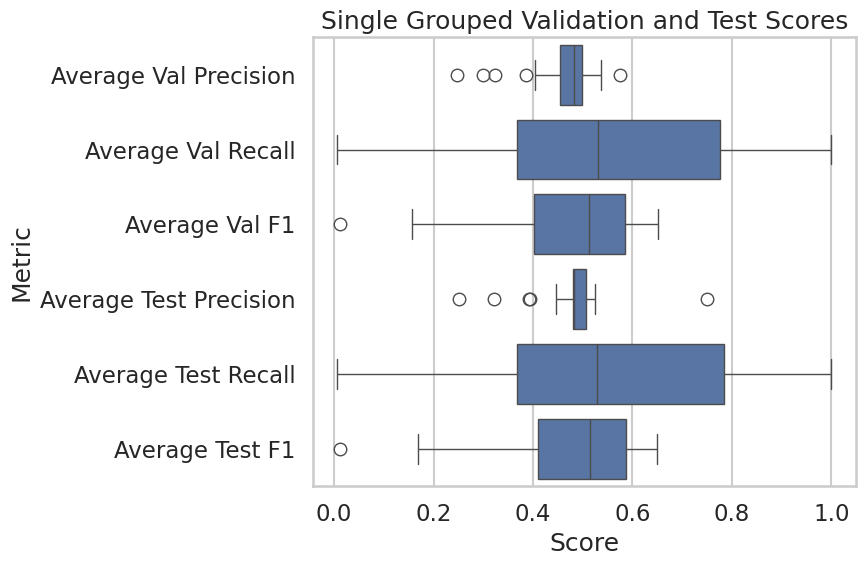

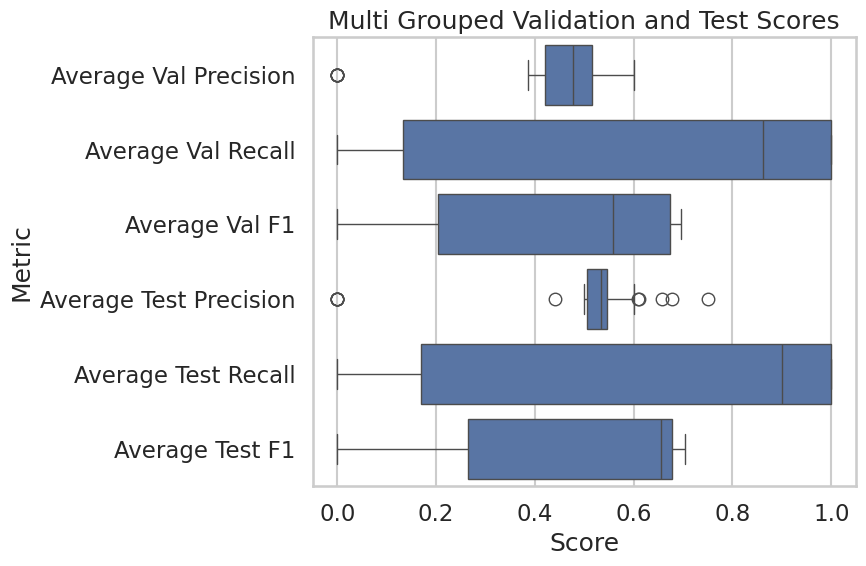

In [ ]:

sns.set_style("whitegrid")
sns.set_context("talk")

df_single_filtered = single_grouped[
    (single_grouped["Epochs"] == 1)
    & (single_grouped["Weight Decay (Regularization)"] == 0.5)
    & (single_grouped["Learning Rate"] == 0.000005)
]

df_single_melted = pd.melt(
    df_single_filtered,
    id_vars=["Model Name", "X Variable", "Dataset Balance"],
    value_vars=[
        "Average Val Precision",
        "Average Val Recall",
        "Average Val F1",
        "Average Test Precision",
        "Average Test Recall",
        "Average Test F1"
    ],
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(9,6))
sns.boxplot(data=df_single_melted, y="Metric", x="Score", orient="h")
plt.title("Single Grouped Validation and Test Scores")
plt.tight_layout()
plt.savefig("single_grouped_boxplot.png", dpi=300)
plt.show()

df_multi_filtered = multi_grouped[
    (multi_grouped["Epochs"] == 1)
    & (multi_grouped["Weight Decay (Regularization)"] == 0.5)
    & (multi_grouped["Learning Rate"] == 0.000005)
]

df_multi_melted = pd.melt(
    df_multi_filtered,
    id_vars=["Model Name", "X Variable", "Dataset Balance"],
    value_vars=[
        "Average Val Precision",
        "Average Val Recall",
        "Average Val F1",
        "Average Test Precision",
        "Average Test Recall",
        "Average Test F1"
    ],
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(9,6))
sns.boxplot(data=df_multi_melted, y="Metric", x="Score", orient="h")
plt.title("Multi Grouped Validation and Test Scores")
plt.tight_layout()
plt.savefig("multi_grouped_boxplot.png", dpi=300)
plt.show()

## Performance over Baseline

In [ ]:

df_pob = pd.read_excel('/content/drive/MyDrive/266-final/results/Performance over Baseline Metrics.xlsx')


In [ ]:
df_pob.tail()

,Model,Task,X Variable,Y Variable,Dataset Balance,Macro Precision,Macro Recall,Macro F1,Val - Avg Precision,Val - Avg Recall,Val - Avg F1,Test - Avg Precision,Test - Avg Recall,Test - Avg F1,Val - Precision % Change,Val - Recall % Change,Val - F1 % Change,Test - Precision % Change,Test - Recall % Change,Test - F1 % Change
126,bert-large-cased,single,pos_sequence,binary_complexity,SemEval-2021,NaN,NaN,NaN,0.575205,0.270833,0.261402,0.513043,0.255102,0.263311,NaN,NaN,NaN,NaN,NaN,NaN
127,bert-base-cased,single,snc_dep_alt,binary_complexity,SemEval-2021,NaN,NaN,NaN,0.486486,0.093750,0.157205,0.489130,0.102041,0.168856,NaN,NaN,NaN,NaN,NaN,NaN
128,bert-base-cased,single,snc_dep_seq,binary_complexity,Re-Balanced,NaN,NaN,NaN,0.300000,0.006224,0.012195,0.750000,0.006224,0.012346,NaN,NaN,NaN,NaN,NaN,NaN
129,bert-base-cased,single,sentence_no_contractions,binary_complexity,Re-Balanced,NaN,NaN,NaN,1.000000,0.002075,0.004141,1.000000,0.002075,0.004141,NaN,NaN,NaN,NaN,NaN,NaN
130,bert-base-cased,single,snc_pos_alt,binary_complexity,SemEval-2021,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model                      131 non-null    object 
 1   Task                       131 non-null    object 
 2   X Variable                 131 non-null    object 
 3   Y Variable                 131 non-null    object 
 4   Dataset Balance            131 non-null    object 
 5   Macro Precision            46 non-null     float64
 6   Macro Recall               46 non-null     float64
 7   Macro F1                   46 non-null     float64
 8   Val - Avg Precision        85 non-null     float64
 9   Val - Avg Recall           85 non-null     float64
 10  Val - Avg F1               85 non-null     float64
 11  Test - Avg Precision       85 non-null     float64
 12  Test - Avg Recall          85 non-null     float64
 13  Test - Avg F1              85 non-null     float64

In [ ]:
for col in df_pob.columns[:5]:
  print(f"Unique values in column '{col}':")
  print(df_pob[col].unique())
  print("")

Unique values in column 'Model':
['Naïve Bayes' 'ModernBERT-base' 'ModernBERT-large' 'bert-base-cased'
 'bert-large-cased']

Unique values in column 'Task':
['single' 'multi']

Unique values in column 'X Variable':
['sentence_no_contractions' 'sentence' 'pos_sequence' 'dep_sequence'
 'morph_sequence' 'snc_pos_seq' 'snc_pos_alt' 'snc_morph_seq'
 'snc_morph_alt' 'snc_dep_seq' 'snc_dep_alt' 'snc_morph_complexity_value']

Unique values in column 'Y Variable':
['binary_complexity']

Unique values in column 'Dataset Balance':
['SemEval-2021' 'Re-Balanced']



In [ ]:
df_nb = df_pob[df_pob['Model'] == 'Naïve Bayes'].copy()

df_bert_like = df_pob[df_pob['Model'].isin([
    'ModernBERT-base', 'ModernBERT-large',
    'bert-base-cased', 'bert-large-cased'
])].copy()

df_bert_like['orig_idx'] = df_bert_like.index

df_nb = df_nb.rename(columns={
    'Macro Precision': 'NB_MacroPrecision',
    'Macro Recall': 'NB_MacroRecall',
    'Macro F1': 'NB_MacroF1'
})

merged_df = pd.merge(
    df_bert_like,
    df_nb[['Task', 'X Variable', 'Y Variable', 'Dataset Balance',
           'NB_MacroPrecision', 'NB_MacroRecall', 'NB_MacroF1']],
    on=['Task', 'X Variable', 'Y Variable', 'Dataset Balance'],
    how='left'
)

def pct_change(bert_val, nb_val):
    """
    Compute percentage change from NB baseline to BERT value:
    ((bert_val - nb_val) / nb_val) * 100,
    returning NaN if nb_val is 0 or NaN.
    """
    if pd.isna(nb_val) or nb_val == 0:
        return np.nan
    return ((bert_val - nb_val) / nb_val) * 100

merged_df['Val - Precision % Change'] = merged_df.apply(
    lambda row: pct_change(row['Val - Avg Precision'], row['NB_MacroPrecision']), axis=1
)

merged_df['Val - Recall % Change'] = merged_df.apply(
    lambda row: pct_change(row['Val - Avg Recall'], row['NB_MacroRecall']), axis=1
)

merged_df['Val - F1 % Change'] = merged_df.apply(
    lambda row: pct_change(row['Val - Avg F1'], row['NB_MacroF1']), axis=1
)

merged_df['Test - Precision % Change'] = merged_df.apply(
    lambda row: pct_change(row['Test - Avg Precision'], row['NB_MacroPrecision']), axis=1
)

merged_df['Test - Recall % Change'] = merged_df.apply(
    lambda row: pct_change(row['Test - Avg Recall'], row['NB_MacroRecall']), axis=1
)

merged_df['Test - F1 % Change'] = merged_df.apply(
    lambda row: pct_change(row['Test - Avg F1'], row['NB_MacroF1']), axis=1
)

for idx in merged_df.index:
    real_index = merged_df.loc[idx, 'orig_idx']

    df_pob.loc[real_index, 'Val - Precision % Change'] = merged_df.loc[idx, 'Val - Precision % Change']
    df_pob.loc[real_index, 'Val - Recall % Change']    = merged_df.loc[idx, 'Val - Recall % Change']
    df_pob.loc[real_index, 'Val - F1 % Change']        = merged_df.loc[idx, 'Val - F1 % Change']

    df_pob.loc[real_index, 'Test - Precision % Change'] = merged_df.loc[idx, 'Test - Precision % Change']
    df_pob.loc[real_index, 'Test - Recall % Change']    = merged_df.loc[idx, 'Test - Recall % Change']
    df_pob.loc[real_index, 'Test - F1 % Change']        = merged_df.loc[idx, 'Test - F1 % Change']

df_pob.loc[
    df_pob['Model'] == 'Naïve Bayes',
    [
        'Val - Precision % Change',
        'Val - Recall % Change',
        'Val - F1 % Change',
        'Test - Precision % Change',
        'Test - Recall % Change',
        'Test - F1 % Change'
    ]
] = np.nan

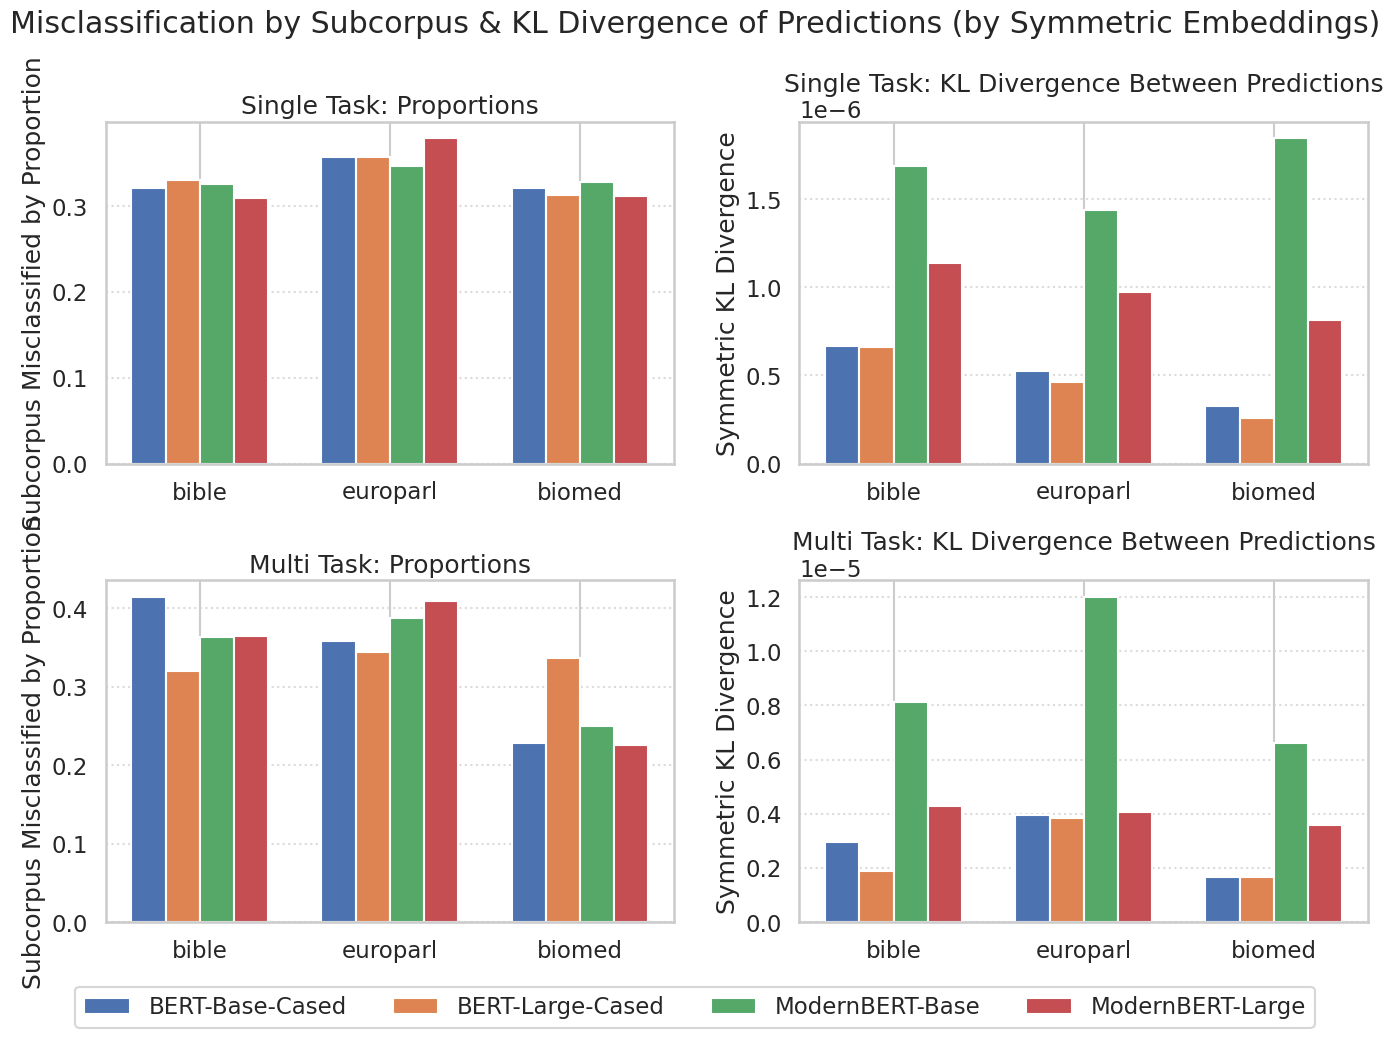

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_single = pd.DataFrame({
    "corpus": ["bible", "europarl", "biomed"],
    "bert_base_cased_miscl": [0.321185, 0.357631, 0.321185],
    "bert_base_cased_kl": [6.683676775615276e-07, 5.228060469033662e-07, 3.244608891516798e-07],
    "bert_large_cased_miscl": [0.329876, 0.356846, 0.313278],
    "bert_large_cased_kl": [6.619976385796855e-07, 4.6426749472826705e-07, 2.593201681598221e-07],
    "modernbert_base_miscl": [0.325773, 0.346392, 0.327835],
    "modernbert_base_kl": [1.6860511154101313e-06, 1.4357515857590244e-06, 1.8457217644529404e-06],
    "modernbert_large_miscl": [0.309426, 0.379098, 0.311475],
    "modernbert_large_kl": [1.1354024662615837e-06, 9.710584787971171e-07, 8.158935155510512e-07]
})

df_multi = pd.DataFrame({
    "corpus": ["bible", "europarl", "biomed"],
    "bert_base_cased_miscl": [0.414634, 0.357724, 0.227642],
    "bert_base_cased_kl": [2.95432516672069e-06, 3.947562264288915e-06, 1.6558011492547724e-06],
    "bert_large_cased_miscl": [0.320, 0.344, 0.336],
    "bert_large_cased_kl": [1.888256876176576e-06, 3.837849675757952e-06, 1.6649774807960557e-06],
    "modernbert_base_miscl": [0.362903, 0.387097, 0.250000],
    "modernbert_base_kl": [8.12416918642706e-06, 1.2013919929424917e-05, 6.612745022528127e-06],
    "modernbert_large_miscl": [0.365217, 0.408696, 0.226087],
    "modernbert_large_kl": [4.29344419874927e-06, 4.058646832767972e-06, 3.5779938949494955e-06]
})

def plot_bar_chart(ax, df, column_map, y_label, title):
    x = np.arange(len(df["corpus"]))
    width = 0.18
    offsets = np.linspace(-width*1.5, width*1.5, len(column_map))
    for (label, col), off in zip(column_map.items(), offsets):
        ax.bar(x + off, df[col], width, label=label)
    ax.set_xticks(x)
    ax.set_xticklabels(df["corpus"], rotation=0)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(axis="y", linestyle=":", alpha=0.7)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Misclassification by Subcorpus & KL Divergence of Predictions (by Symmetric Embeddings)")

col_single_miscl = {
    "BERT-Base-Cased": "bert_base_cased_miscl",
    "BERT-Large-Cased": "bert_large_cased_miscl",
    "ModernBERT-Base": "modernbert_base_miscl",
    "ModernBERT-Large": "modernbert_large_miscl"
}
plot_bar_chart(axes[0,0], df_single, col_single_miscl, "Subcorpus Misclassified by Proportion", "Single Task: Proportions")

col_single_kl = {
    "BERT-Base-Cased": "bert_base_cased_kl",
    "BERT-Large-Cased": "bert_large_cased_kl",
    "ModernBERT-Base": "modernbert_base_kl",
    "ModernBERT-Large": "modernbert_large_kl"
}
plot_bar_chart(axes[0,1], df_single, col_single_kl, "Symmetric KL Divergence", "Single Task: KL Divergence Between Predictions")

col_multi_miscl = {
    "BERT-Base-Cased": "bert_base_cased_miscl",
    "BERT-Large-Cased": "bert_large_cased_miscl",
    "ModernBERT-Base": "modernbert_base_miscl",
    "ModernBERT-Large": "modernbert_large_miscl"
}
plot_bar_chart(axes[1,0], df_multi, col_multi_miscl, "Subcorpus Misclassified by Proportion", "Multi Task: Proportions")

col_multi_kl = {
    "BERT-Base-Cased": "bert_base_cased_kl",
    "BERT-Large-Cased": "bert_large_cased_kl",
    "ModernBERT-Base": "modernbert_base_kl",
    "ModernBERT-Large": "modernbert_large_kl"
}
plot_bar_chart(axes[1,1], df_multi, col_multi_kl, "Symmetric KL Divergence", "Multi Task: KL Divergence Between Predictions")

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=4)
fig.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

In [ ]:
display(df_pob)

,Model,Task,X Variable,Y Variable,Dataset Balance,Macro Precision,Macro Recall,Macro F1,Val - Avg Precision,Val - Avg Recall,Val - Avg F1,Test - Avg Precision,Test - Avg Recall,Test - Avg F1,Val - Precision % Change,Val - Recall % Change,Val - F1 % Change,Test - Precision % Change,Test - Recall % Change,Test - F1 % Change
0,Naïve Bayes,single,sentence_no_contractions,binary_complexity,SemEval-2021,0.57,0.56,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Naïve Bayes,single,sentence,binary_complexity,SemEval-2021,0.57,0.56,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Naïve Bayes,multi,sentence_no_contractions,binary_complexity,SemEval-2021,0.53,0.54,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Naïve Bayes,multi,sentence,binary_complexity,SemEval-2021,0.54,0.54,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Naïve Bayes,single,pos_sequence,binary_complexity,SemEval-2021,0.57,0.56,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,bert-large-cased,single,pos_sequence,binary_complexity,SemEval-2021,NaN,NaN,NaN,0.575205,0.270833,0.261402,0.513043,0.255102,0.263311,0.913076,-51.636905,-54.139916,-9.992372,-54.446064,-53.805025
127,bert-base-cased,single,snc_dep_alt,binary_complexity,SemEval-2021,NaN,NaN,NaN,0.486486,0.093750,0.157205,0.489130,0.102041,0.168856,-14.651494,-83.258929,-71.417229,-14.187643,-81.778426,-69.298994
128,bert-base-cased,single,snc_dep_seq,binary_complexity,Re-Balanced,NaN,NaN,NaN,0.300000,0.006224,0.012195,0.750000,0.006224,0.012346,-47.368421,-98.888560,-97.782705,31.578947,-98.888560,-97.755331
129,bert-base-cased,single,sentence_no_contractions,binary_complexity,Re-Balanced,NaN,NaN,NaN,1.000000,0.002075,0.004141,1.000000,0.002075,0.004141,75.438596,-99.636020,-99.260574,75.438596,-99.636020,-99.260574


In [ ]:
# print(df_pob.head(50))

In [ ]:
df_pob.to_csv(dir_results + 'Performance over Baseline Metrics with Point Change.csv', index=False)